# Statistics Advanced - 2

1.  What is hypothesis testing in statistics?
  - Hypothesis testing is a form of statistical inference that uses data from a sample to draw conclusions about a population parameter or a population probability distribution. First, a tentative assumption is made about the parameter or distribution. This assumption is called the null hypothesis and is denoted by H0.

2. What is the null hypothesis, and how does it differ from the alternative
hypothesis?
  - Null and alternative hypotheses are used in statistical hypothesis testing. The null hypothesis of a test always predicts no effect or no relationship between variables, while the alternative hypothesis states your research prediction of an effect or relationship.

3. Explain the significance level in hypothesis testing and its role in deciding
the outcome of a test.
  - In statistics, the significance level defines the strength of evidence in probabilistic terms. Specifically, alpha represents the probability that tests will produce statistically significant results when the null hypothesis is correct. Rejecting a true null hypothesis is a type I error.

4. What are Type I and Type II errors? Give examples of each.
  - In statistics, a Type I error means rejecting the null hypothesis when it's actually true, while a Type II error means failing to reject the null hypothesis when it's actually false.

5. What is the difference between a Z-test and a T-test? Explain when to use
each.
  - A Z-test is used when you have a large sample size (typically n ≥ 30) or when you know the population standard deviation. Since the sample size is large, the sampling distribution of the mean is approximately normal, even if the original data isn't, due to the Central Limit Theorem. The Z-test statistic follows a standard normal distribution (Z-distribution).

When to use:

The population standard deviation (σ) is known.

The sample size is large (n≥30).

  - A T-test is used when you have a small sample size (typically n < 30) and the population standard deviation is unknown. Instead of using the population standard deviation, the T-test uses the sample standard deviation to estimate the population value. Because of this added uncertainty, the T-test statistic follows a T-distribution, which has heavier tails than the normal distribution to account for the variability in the small sample. The shape of the T-distribution depends on the degrees of freedom (n-1).

When to use:

The population standard deviation (σ) is unknown.

The sample size is small (n<30).

6. Write a Python program to generate a binomial distribution with n=10 and
p=0.5, then plot its histogram.

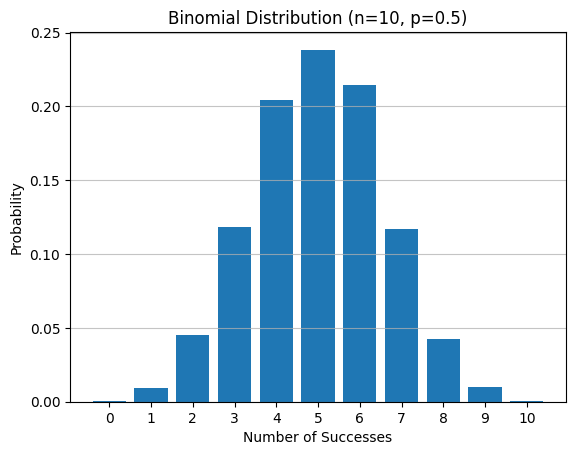

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Program to generate and plot a binomial distribution ---

def plot_binomial_distribution(n, p, num_samples):
    data = np.random.binomial(n=n, p=p, size=num_samples)

    plt.hist(data, bins=np.arange(n + 2) - 0.5, density=True, rwidth=0.8)

    plt.title(f'Binomial Distribution (n={n}, p={p})')
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')

    plt.xticks(range(n + 1))

    plt.grid(axis='y', alpha=0.75)
    plt.show()

if __name__ == "__main__":

    n_trials = 10
    p_success = 0.5

    number_of_samples = 10000

    plot_binomial_distribution(n_trials, p_success, number_of_samples)

7. Implement hypothesis testing using Z-statistics for a sample dataset in
Python. Show the Python code and interpret the results.

sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

In [2]:
import numpy as np
from scipy import stats

sample_data = np.array([
    49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
    50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.5, 49.9
])

sample_data = np.concatenate((sample_data, [
    50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
    50.3, 50.4, 50.0, 49.7, 50.5, 49.9
]))

hypothesized_population_mean = 50.0

known_population_std_dev = 1.0

alpha = 0.05

sample_size = len(sample_data)
sample_mean = np.mean(sample_data)
print(f"Sample size (n): {sample_size}")
print(f"Sample mean (x̄): {sample_mean:.4f}")
print(f"Hypothesized population mean (μ₀): {hypothesized_population_mean}")
print(f"Known population standard deviation (σ): {known_population_std_dev}")

z_statistic = (sample_mean - hypothesized_population_mean) / (known_population_std_dev / np.sqrt(sample_size))

p_value = 2 * stats.norm.cdf(-np.abs(z_statistic))

print("\n--- Z-Test Results ---")
print(f"Calculated Z-statistic: {z_statistic:.4f}")
print(f"Calculated p-value: {p_value:.4f}")

if p_value < alpha:
    print(f"\nSince the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("Conclusion: The sample mean is statistically different from the hypothesized population mean.")
else:
    print(f"\nSince the p-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to say that the sample mean is statistically different from the hypothesized population mean.")

Sample size (n): 36
Sample mean (x̄): 50.1083
Hypothesized population mean (μ₀): 50.0
Known population standard deviation (σ): 1.0

--- Z-Test Results ---
Calculated Z-statistic: 0.6500
Calculated p-value: 0.5157

Since the p-value (0.5157) is greater than or equal to alpha (0.05), we fail to reject the null hypothesis.
Conclusion: There is not enough evidence to say that the sample mean is statistically different from the hypothesized population mean.


8. Write a Python script to simulate data from a normal distribution and
calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.


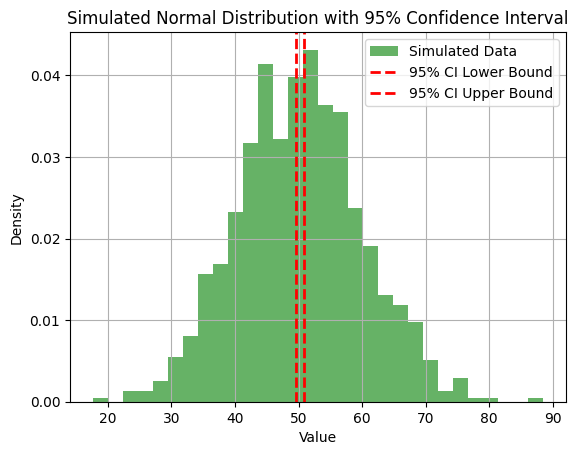

In [5]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)

confidence_interval = st.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=st.sem(data))

plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Simulated Data')
plt.axvline(confidence_interval[0], color='r', linestyle='dashed', linewidth=2, label='95% CI Lower Bound')
plt.axvline(confidence_interval[1], color='r', linestyle='dashed', linewidth=2, label='95% CI Upper Bound')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Simulated Normal Distribution with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

9. Write a Python function to calculate the Z-scores from a dataset and
visualize the standardized data using a histogram. Explain what the Z-scores represent
in terms of standard deviations from the mean.

--- Data Simulation ---
Simulated 500 data points from a normal distribution.
Population Mean: 100, Population Std Dev: 15

--- Sample Statistics ---
Sample Mean (x̄): 101.6273
Sample Standard Deviation (s): 15.1537

--- Confidence Interval ---
95% Confidence Interval: (100.2958, 102.9588)


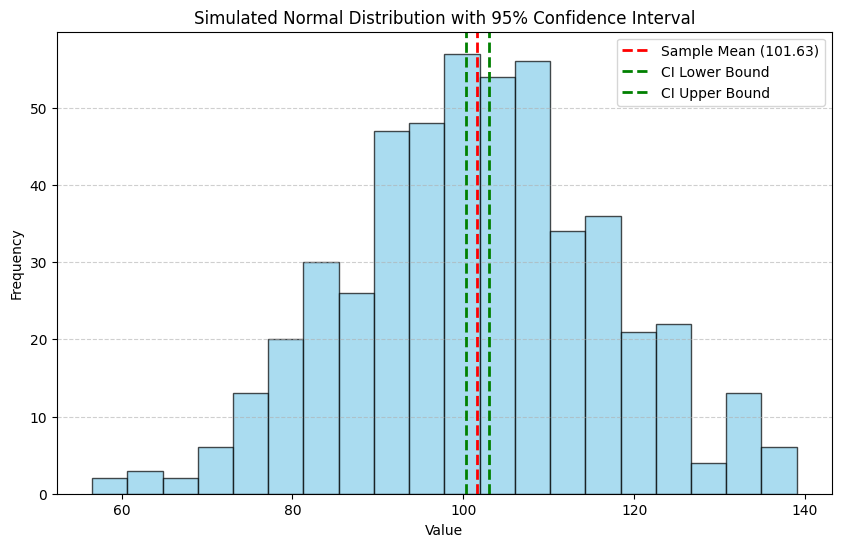


--- Z-Score Calculation ---
Mean of Z-scores: -0.0000
Standard deviation of Z-scores: 1.0000


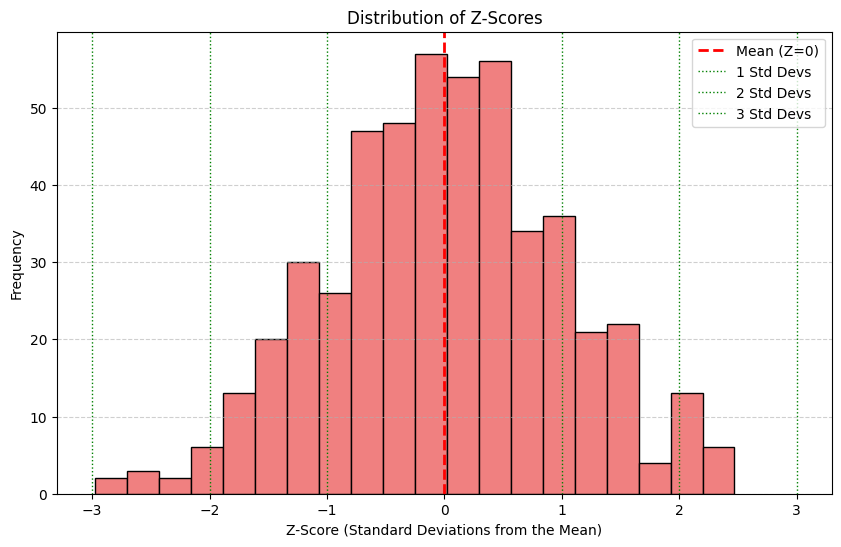

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def analyze_and_plot_data(mean, std_dev, num_samples, confidence_level=0.95):
    simulated_data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

    print("--- Data Simulation ---")
    print(f"Simulated {num_samples} data points from a normal distribution.")
    print(f"Population Mean: {mean}, Population Std Dev: {std_dev}")

    sample_mean = np.mean(simulated_data)
    sample_std_dev = np.std(simulated_data, ddof=1)

    print("\n--- Sample Statistics ---")
    print(f"Sample Mean (x̄): {sample_mean:.4f}")
    print(f"Sample Standard Deviation (s): {sample_std_dev:.4f}")
    degrees_of_freedom = num_samples - 1
    standard_error = sample_std_dev / np.sqrt(num_samples)

    confidence_interval = stats.t.interval(
        confidence_level,
        degrees_of_freedom,
        loc=sample_mean,
        scale=standard_error
    )

    print("\n--- Confidence Interval ---")
    print(f"{confidence_level*100:.0f}% Confidence Interval: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")

    plt.figure(figsize=(10, 6))

    plt.hist(simulated_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')

    plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Sample Mean ({sample_mean:.2f})')
    plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='CI Lower Bound')
    plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='CI Upper Bound')

    plt.title(f'Simulated Normal Distribution with {confidence_level*100:.0f}% Confidence Interval')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

    return simulated_data


def calculate_and_plot_z_scores(data):

    print("\n--- Z-Score Calculation ---")

    data_mean = np.mean(data)
    data_std_dev = np.std(data)

    z_scores = (data - data_mean) / data_std_dev

    print(f"Mean of Z-scores: {np.mean(z_scores):.4f}")
    print(f"Standard deviation of Z-scores: {np.std(z_scores):.4f}")

    plt.figure(figsize=(10, 6))
    plt.hist(z_scores, bins=20, color='lightcoral', edgecolor='black')

    plt.title('Distribution of Z-Scores')
    plt.xlabel('Z-Score (Standard Deviations from the Mean)')
    plt.ylabel('Frequency')

    plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label='Mean (Z=0)')
    for i in [-3, -2, -1, 1, 2, 3]:
        plt.axvline(i, color='green', linestyle='dotted', linewidth=1, label=f'{i} Std Devs' if i > 0 else '')

    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

if __name__ == "__main__":

    population_mean = 100
    population_std_dev = 15
    number_of_samples = 500

    simulated_data = analyze_and_plot_data(population_mean, population_std_dev, number_of_samples)

    calculate_and_plot_z_scores(simulated_data)
